In [1]:
import matplotlib
print(matplotlib.__path__)

['D:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib']


In [6]:
%cd D:\ProgramData\Anaconda3\lib\site-packages\matplotlib
    

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib


In [7]:
%cd mpl-data/fonts/ttf

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf


In [60]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]},
{name:'保定', geoCoord:[115.47, 38.87]}
"""

In [61]:
city_locaion = {}


In [62]:
import re


In [63]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [59]:
pattern.findall("name:'澳门', geoCoord:[115.47, 38.87]")

[('澳门', '115.47', '38.87')]

In [64]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    city,long,lat = city_info[0]
    long,lat = float(long),float(lat)
    city_locaion[city] = (long,lat)
    

In [65]:
city_locaion

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19),
 '保定': (115.47, 38.87)}

In [8]:
import math

In [9]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [10]:
def city_distance(city1,city2):
    return geo_distance(city_locaion[city1],city_locaion[city2])

In [11]:
city_distance('北京','上海')

727.52769688981

In [12]:
import networkx as nx

In [13]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_locaion.keys()))


In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

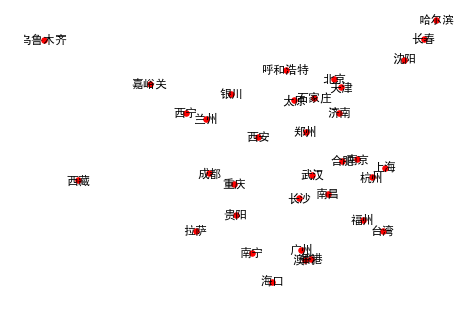

In [17]:
nx.draw(city_graph,city_locaion,with_labels=True,node_size=30)

In [79]:
G = nx.Graph()

In [84]:
G.add_node((2,3))

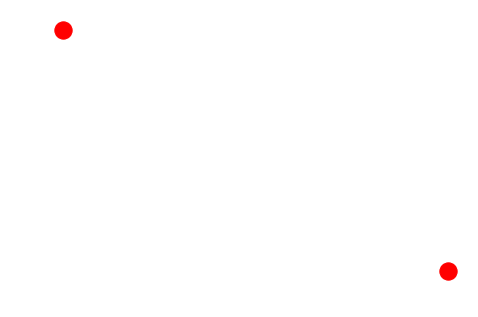

In [85]:
nx.draw(G)

In [228]:
distence = 300

In [23]:
from collections import defaultdict

In [230]:
city_connection = defaultdict(list)

In [239]:
for c1 in city_locaion:
    for c2 in city_locaion:
        if c1 == c2: continue
        
        dist = city_distance(c1,c2)
        #print(c1,c2)
        if dist < distence:
            
            city_connection[c1].append(c2)
            
            city_connection[c2].append(c1)

In [235]:
city_distance('兰州','西宁')

221.65665359229743

In [240]:
for city in city_connection:
    city_connection[city] = list(set(city_connection[city]))

In [241]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川'],
             '西宁': ['拉萨', '兰州', '成都'],
             '成都': ['重庆', '拉萨', '兰州', '西宁'],
             '银川': ['重庆', '兰州'],
             '拉萨': ['西宁', '成都'],
             '重庆': ['银川', '成都', '贵阳'],
             '石家庄': ['太原', '济南', '郑州', '北京'],
             '郑州': ['太原', '武汉', '长沙', '石家庄'],
             '济南': ['合肥', '石家庄', '天津', '北京'],
             '太原': ['呼和浩特', '郑州', '石家庄'],
             '北京': ['济南', '石家庄', '天津'],
             '贵阳': ['重庆', '南宁'],
             '南宁': ['海口', '贵阳'],
             '武汉': ['郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥'],
             '长沙': ['武汉', '广州', '郑州', '香港', '澳门'],
             '合肥': ['南京', '济南', '南昌'],
             '天津': ['济南', '北京'],
             '南京': ['合肥', '杭州'],
             '杭州': ['南京', '福州', '上海'],
             '福州': ['台湾', '杭州'],
             '上海': ['杭州'],
             '台湾': ['福州'],
             '广州': ['澳门', '长沙', '香港'],
             '香港': ['广州', '长沙', '澳门'],
             '澳门': ['广州', '长沙', '香港'

In [242]:
city_label = nx.Graph(city_connection)

D:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


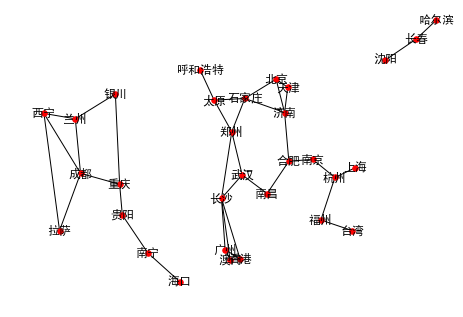

In [243]:
nx.draw(city_label,city_locaion,with_labels=True,node_size=30)

In [20]:
simple_connection_info_src = {
    '北京': ['保定', '沈阳','郑州'],
    '保定': ['北京','太原'],
    '太原': ['保定', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原','长沙','北京'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁','郑州'],
    '沈阳': ['北京']
    
}

In [24]:
simple_connection_info = defaultdict(list)

In [25]:
simple_connection_info.update(simple_connection_info_src)

D:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


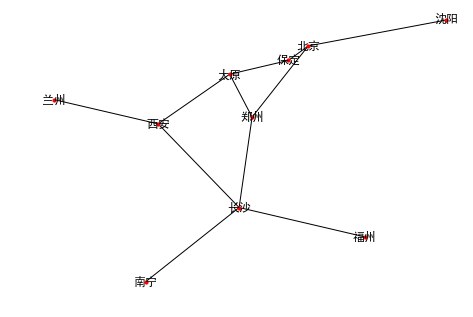

In [66]:
nx.draw(nx.Graph(simple_connection_info),city_locaion,with_labels=True,node_size=10)

In [258]:


def bsf(graph,start):
    visited = [start]
    seen = set()
    while visited:
        froninter = visited.pop()
        print(froninter)
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            #print(successor)
            
            #visited = visited + [successor] ## 深度优先
            visited = [successor] + visited ##广度优先
            print(visited)
            
        seen.add(froninter)
        print(seen)
    return seen
            
    

In [259]:
bsf(simple_connection_info,'北京')

北京
['太原']
['沈阳', '太原']
['郑州', '沈阳', '太原']
{'北京'}
太原
['西安', '郑州', '沈阳']
['郑州', '西安', '郑州', '沈阳']
{'太原', '北京'}
沈阳
{'太原', '沈阳', '北京'}
郑州
['长沙', '郑州', '西安']
{'太原', '沈阳', '郑州', '北京'}
西安
['兰州', '长沙', '郑州']
['长沙', '兰州', '长沙', '郑州']
{'西安', '北京', '郑州', '太原', '沈阳'}
郑州
长沙
['福州', '长沙', '兰州']
['南宁', '福州', '长沙', '兰州']
{'长沙', '西安', '北京', '郑州', '太原', '沈阳'}
兰州
{'长沙', '西安', '北京', '郑州', '太原', '沈阳', '兰州'}
长沙
福州
{'长沙', '西安', '福州', '北京', '郑州', '太原', '沈阳', '兰州'}
南宁
{'长沙', '西安', '南宁', '福州', '北京', '郑州', '太原', '沈阳', '兰州'}


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [68]:
##怎么实现深度优先？？？

def search(start,destination,connect_graph):#sort_canditate):
    pathes  = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0) ###
        #print(path)
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successor = connect_graph[froninter]
        for city in successor:
            
            if city in path: continue
            #print(city) 
            new_path = path + [city]
            #new_path = [city] + path 
            pathes.append(new_path)#
            #print(pathes) 
            if city == destination: return new_path
            
        visited.add(froninter)
        #print(pathes)
        #pathes = sort_canditate(pathes)   


In [70]:
search('北京','兰州',simple_connection_info)

['北京', '保定', '太原', '西安', '兰州']

In [271]:
def transform_station_first(pathes):
    return sorted(pathes,key=len)

In [265]:
def transform_as_mush_station(pathes):
    return sorted(pathes,key=len,reverse=True)

In [279]:
def get_path_dentence(path):
        distance = 0
        for i in range(len(path)):
            if i <= len(path) - 2:
                distance += city_distance(path[i],path[i+1])
        return distance

In [282]:
path = ['长沙', '西安', '北京', '郑州', '太原', '沈阳']
get_path_dentence(path)


3181.756153858689

In [287]:
def shortest_path_first(pathes):
    if len(pathes) <= 1: return pathes

    return sorted(pathes,key=get_path_dentence)
    

In [288]:
search('北京','武汉',city_connection,sort_canditate=shortest_path_first)

['北京', '石家庄', '郑州', '武汉']

In [289]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [290]:
pretty_print(search('北京','武汉',city_connection,sort_canditate=shortest_path_first))

北京🚗->石家庄🚗->郑州🚗->武汉


爬虫

In [302]:
import requests

In [292]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [298]:
response = requests.get(url)
response.text

'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n        蜘蛛侠：英雄远征 (豆瓣)\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">\n    <link href="https://img3.doubanio.com/f/shire/52c9997d6d42db58eab418e976a14d5f3eff981e/css/douban.css" rel="stylesheet" type="text/css">\n    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet

In [309]:
patten = re.compile(r'<a href="(https://movie\.douban\.com/subject/\d+/\?from=subject-page)" ')       

In [310]:
patten.findall(response.text)

['https://movie.douban.com/subject/24753477/?from=subject-page',
 'https://movie.douban.com/subject/24753477/?from=subject-page',
 'https://movie.douban.com/subject/26100958/?from=subject-page',
 'https://movie.douban.com/subject/26100958/?from=subject-page',
 'https://movie.douban.com/subject/25820460/?from=subject-page',
 'https://movie.douban.com/subject/25820460/?from=subject-page',
 'https://movie.douban.com/subject/1432146/?from=subject-page',
 'https://movie.douban.com/subject/1432146/?from=subject-page',
 'https://movie.douban.com/subject/25937854/?from=subject-page',
 'https://movie.douban.com/subject/25937854/?from=subject-page',
 'https://movie.douban.com/subject/1866473/?from=subject-page',
 'https://movie.douban.com/subject/1866473/?from=subject-page',
 'https://movie.douban.com/subject/25821634/?from=subject-page',
 'https://movie.douban.com/subject/25821634/?from=subject-page',
 'https://movie.douban.com/subject/26213252/?from=subject-page',
 'https://movie.douban.com/su

## Machine learning

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X,y = data['data'],data['target']

In [5]:
X[1],y[1]

(array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]), 21.6)

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [89]:
#散点图
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

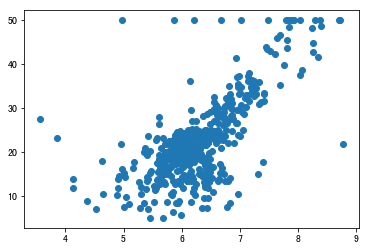

In [90]:
draw_rm_and_price()

In [10]:
import random

In [11]:
def price(rm,k,b):
    return k * rm + b

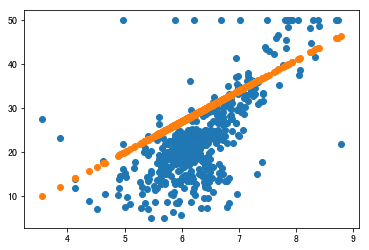

In [31]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b  = [price(r,k,b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

## loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

In [34]:
def loss(y,y_hat):
    return sum(((y_i - y_hat_i)**2) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

## First-Method 随机选择

In [38]:
try_times = 20000
min_loss = float('inf')
best_k,best_b = None,None

for i in range(try_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = k,b
        print('when times is :{},get best_k: {} best_b: {},and the loss is {}'.
              format(i,best_k,best_b,current_loss))

when times is :0,get best_k: 5.168268681873386 best_b: 54.16595711467437,and the loss is 4161.808240086393
when times is :26,get best_k: 1.6244160036082747 best_b: -40.75557048640166,and the loss is 2888.585077508717
when times is :41,get best_k: -14.687349244071541 best_b: 69.99426069053897,and the loss is 2333.3451706189917
when times is :47,get best_k: 3.63695002972959 best_b: -27.95886468461744,and the loss is 821.99685511372
when times is :61,get best_k: 8.085947088997386 best_b: -10.307162744811961,and the loss is 367.29089311758247
when times is :72,get best_k: 10.898097730619625 best_b: -52.66379960654637,and the loss is 90.160832748476
when times is :119,get best_k: 6.354470295421237 best_b: -23.316505462459205,and the loss is 82.29306669240785
when times is :213,get best_k: 8.977010802493623 best_b: -29.730767190119067,and the loss is 60.861130954567976
when times is :334,get best_k: 7.650560483644341 best_b: -25.806345217453284,and the loss is 44.70531203219761
when times is

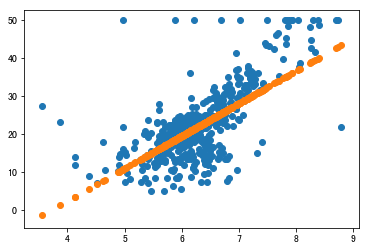

In [37]:
X_rm = X[:,5]
k = 8.594286275249402
b = -32.07201743475663
price_by_random_k_and_b  = [price(r,k,b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

## 2nd-Method 给定一个变化的方向

In [43]:
try_times = 20000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [(+1,-1),(+1,+1),(-1,+1),(-1,-1)]

next_diretion = random.choice(direction)

scalar = 0.01
update_time = 0

for i in range(try_times):
    k_diretion,b_diretion = next_diretion
    
    current_k,current_b = best_k + k_diretion * scalar,best_b + b_diretion * scalar
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = current_k,current_b
        
        next_diretion = next_diretion
        update_time += 1
        
        if update_time % 10 == 0:
            print('when times is :{},get best_k: {} best_b: {},and the loss is {}'.
              format(i,best_k,best_b,current_loss))
    else: 
        next_diretion = random.choice(direction)
    


when times is :9,get best_k: -2.1487688550410873 best_b: 58.66389861731547,and the loss is 617.9420712508634
when times is :19,get best_k: -2.248768855041085 best_b: 58.56389861731549,and the loss is 586.6206191943958
when times is :29,get best_k: -2.348768855041083 best_b: 58.46389861731551,and the loss is 556.3703390053994
when times is :39,get best_k: -2.448768855041081 best_b: 58.36389861731553,and the loss is 527.191230683872
when times is :49,get best_k: -2.5487688550410788 best_b: 58.26389861731555,and the loss is 499.0832942298157
when times is :59,get best_k: -2.6487688550410766 best_b: 58.16389861731557,and the loss is 472.0465296432299
when times is :69,get best_k: -2.7487688550410745 best_b: 58.06389861731559,and the loss is 446.08093692411364
when times is :79,get best_k: -2.8487688550410724 best_b: 57.96389861731561,and the loss is 421.1865160724677
when times is :89,get best_k: -2.9487688550410702 best_b: 57.86389861731563,and the loss is 397.363267088293
when times is :

when times is :1386,get best_k: -4.148768855041045 best_b: 49.56389861731728,and the loss is 131.0278092215803
when times is :1403,get best_k: -4.1087688550410455 best_b: 49.4638986173173,and the loss is 130.81915586328415
when times is :1421,get best_k: -4.088768855041046 best_b: 49.36389861731732,and the loss is 130.61664107284224
when times is :1434,get best_k: -4.068768855041046 best_b: 49.26389861731734,and the loss is 130.41584066698059
when times is :1445,get best_k: -4.048768855041047 best_b: 49.16389861731736,and the loss is 130.21675464569907
when times is :1475,get best_k: -4.048768855041047 best_b: 49.06389861731738,and the loss is 129.9895425816236
when times is :1491,get best_k: -4.048768855041047 best_b: 48.9638986173174,and the loss is 129.78233051754844
when times is :1505,get best_k: -4.028768855041047 best_b: 48.86389861731742,and the loss is 129.5746818057486
when times is :1520,get best_k: -4.028768855041047 best_b: 48.76389861731744,and the loss is 129.38233120412

when times is :2776,get best_k: -2.9287688550410707 best_b: 41.86389861731881,and the loss is 115.7696024076815
when times is :2789,get best_k: -2.908768855041071 best_b: 41.76389861731883,and the loss is 115.5808811691338
when times is :2813,get best_k: -2.8887688550410715 best_b: 41.66389861731885,and the loss is 115.39387431516619
when times is :2832,get best_k: -2.868768855041072 best_b: 41.56389861731887,and the loss is 115.20858184577898
when times is :2851,get best_k: -2.8487688550410724 best_b: 41.46389861731889,and the loss is 115.02500376097181
when times is :2871,get best_k: -2.828768855041073 best_b: 41.36389861731891,and the loss is 114.8431400607451
when times is :2900,get best_k: -2.808768855041073 best_b: 41.26389861731893,and the loss is 114.66299074509855
when times is :2919,get best_k: -2.7887688550410736 best_b: 41.16389861731895,and the loss is 114.48455581403208
when times is :2933,get best_k: -2.768768855041074 best_b: 41.06389861731897,and the loss is 114.307835

when times is :4270,get best_k: -1.60876885504109 best_b: 33.56389861732046,and the loss is 100.97142362138239
when times is :4283,get best_k: -1.58876885504109 best_b: 33.46389861732048,and the loss is 100.80849662679043
when times is :4304,get best_k: -1.58876885504109 best_b: 33.3638986173205,and the loss is 100.62924444413733
when times is :4323,get best_k: -1.5687688550410899 best_b: 33.26389861732052,and the loss is 100.46289329657631
when times is :4339,get best_k: -1.5687688550410899 best_b: 33.16389861732054,and the loss is 100.2985025763739
when times is :4358,get best_k: -1.5487688550410899 best_b: 33.06389861732056,and the loss is 100.12872727584357
when times is :4376,get best_k: -1.5487688550410899 best_b: 32.96389861732058,and the loss is 99.9791980180918
when times is :4391,get best_k: -1.5087688550410898 best_b: 32.8638986173206,and the loss is 99.79431982852367
when times is :4404,get best_k: -1.4887688550410898 best_b: 32.76389861732062,and the loss is 99.62968768173

when times is :5919,get best_k: -0.3687688550410888 best_b: 25.563898617319765,and the loss is 88.30319768090308
when times is :5937,get best_k: -0.3687688550410888 best_b: 25.46389861731975,and the loss is 88.1704947077364
when times is :5957,get best_k: -0.32876885504108877 best_b: 25.363898617319734,and the loss is 88.00665441247004
when times is :5985,get best_k: -0.30876885504108875 best_b: 25.263898617319718,and the loss is 87.86095435512388
when times is :6007,get best_k: -0.30876885504108875 best_b: 25.163898617319703,and the loss is 87.71283576930885
when times is :6025,get best_k: -0.2687688550410887 best_b: 25.063898617319687,and the loss is 87.57469739417213
when times is :6043,get best_k: -0.2487688550410887 best_b: 24.96389861731967,and the loss is 87.43414049056666
when times is :6061,get best_k: -0.2687688550410887 best_b: 24.863898617319656,and the loss is 87.27790607234473
when times is :6095,get best_k: -0.22876885504108868 best_b: 24.76389861731964,and the loss is 8

when times is :7561,get best_k: 0.8112311449589119 best_b: 18.063898617318593,and the loss is 77.86388191648746
when times is :7578,get best_k: 0.851231144958912 best_b: 17.963898617318577,and the loss is 77.75135659062146
when times is :7595,get best_k: 0.8312311449589119 best_b: 17.86389861731856,and the loss is 77.61266995329329
when times is :7613,get best_k: 0.871231144958912 best_b: 17.763898617318546,and the loss is 77.4784348590384
when times is :7635,get best_k: 0.871231144958912 best_b: 17.66389861731853,and the loss is 77.34714255780871
when times is :7658,get best_k: 0.891231144958912 best_b: 17.563898617318515,and the loss is 77.21695043693671
when times is :7676,get best_k: 0.931231144958912 best_b: 17.4638986173185,and the loss is 77.1084172628115
when times is :7690,get best_k: 0.911231144958912 best_b: 17.363898617318483,and the loss is 76.96690332431638
when times is :7710,get best_k: 0.951231144958912 best_b: 17.263898617318468,and the loss is 76.83666038180225
when 

when times is :9482,get best_k: 2.1512311449589094 best_b: 9.563898617318408,and the loss is 67.70834816110316
when times is :9502,get best_k: 2.171231144958909 best_b: 9.46389861731841,and the loss is 67.60052151502643
when times is :9539,get best_k: 2.1912311449589086 best_b: 9.363898617318412,and the loss is 67.49440925353004
when times is :9557,get best_k: 2.1912311449589086 best_b: 9.263898617318414,and the loss is 67.3839734740395
when times is :9577,get best_k: 2.2312311449589077 best_b: 9.163898617318416,and the loss is 67.28732788427784
when times is :9606,get best_k: 2.2312311449589077 best_b: 9.063898617318419,and the loss is 67.16661502968842
when times is :9623,get best_k: 2.2512311449589073 best_b: 8.96389861731842,and the loss is 67.06050738438337
when times is :9645,get best_k: 2.271231144958907 best_b: 8.863898617318423,and the loss is 66.95611412365848
when times is :9669,get best_k: 2.271231144958907 best_b: 8.763898617318425,and the loss is 66.84512419397029
when ti

when times is :11355,get best_k: 3.3112311449588847 best_b: 2.1638986173185657,and the loss is 60.31717828367025
when times is :11398,get best_k: 3.3312311449588843 best_b: 2.063898617318568,and the loss is 60.22656934245683
when times is :11426,get best_k: 3.3312311449588843 best_b: 1.963898617318569,and the loss is 60.143236922650125
when times is :11447,get best_k: 3.351231144958884 best_b: 1.863898617318569,and the loss is 60.04920382846749
when times is :11490,get best_k: 3.3712311449588834 best_b: 1.763898617318569,and the loss is 59.95688511886513
when times is :11508,get best_k: 3.391231144958883 best_b: 1.6638986173185688,and the loss is 59.86628079384294
when times is :11547,get best_k: 3.4112311449588826 best_b: 1.5638986173185687,and the loss is 59.777390853401066
when times is :11569,get best_k: 3.431231144958882 best_b: 1.4638986173185686,and the loss is 59.69021529753942
when times is :11604,get best_k: 3.4512311449588817 best_b: 1.3638986173185685,and the loss is 59.604

when times is :13657,get best_k: 4.571231144958858 best_b: -5.836101382681353,and the loss is 53.844338358636925
when times is :13680,get best_k: 4.591231144958858 best_b: -5.9361013826813505,and the loss is 53.774380507638476
when times is :13709,get best_k: 4.591231144958858 best_b: -6.036101382681348,and the loss is 53.7073202222191
when times is :13736,get best_k: 4.631231144958857 best_b: -6.136101382681346,and the loss is 53.63960795938233
when times is :13767,get best_k: 4.631231144958857 best_b: -6.236101382681344,and the loss is 53.56227059886413
when times is :13801,get best_k: 4.651231144958857 best_b: -6.336101382681342,and the loss is 53.49231736405708
when times is :13831,get best_k: 4.671231144958856 best_b: -6.43610138268134,and the loss is 53.42407851383022
when times is :13856,get best_k: 4.671231144958856 best_b: -6.536101382681338,and the loss is 53.35646407821314
when times is :13894,get best_k: 4.691231144958856 best_b: -6.6361013826813355,and the loss is 53.28480

when times is :16301,get best_k: 5.751231144958833 best_b: -13.336101382681193,and the loss is 49.2086097539557
when times is :16351,get best_k: 5.771231144958833 best_b: -13.43610138268119,and the loss is 49.15758399240077
when times is :16388,get best_k: 5.791231144958832 best_b: -13.536101382681188,and the loss is 49.10827261542608
when times is :16430,get best_k: 5.791231144958832 best_b: -13.636101382681186,and the loss is 49.052900077042274
when times is :16471,get best_k: 5.811231144958832 best_b: -13.736101382681184,and the loss is 49.00016454709838
when times is :16530,get best_k: 5.831231144958831 best_b: -13.836101382681182,and the loss is 48.949143401734695
when times is :16604,get best_k: 5.851231144958831 best_b: -13.93610138268118,and the loss is 48.89983664095131
when times is :16643,get best_k: 5.851231144958831 best_b: -14.036101382681178,and the loss is 48.8490484899193
when times is :16676,get best_k: 5.871231144958831 best_b: -14.136101382681176,and the loss is 48.

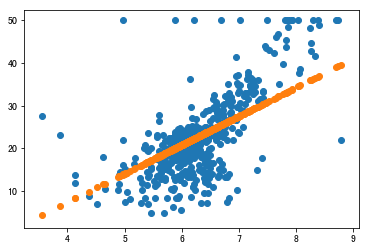

In [44]:
X_rm = X[:,5]
k = 6.731231144958812
b =  -19.53610138268169
price_by_random_k_and_b  = [price(r,k,b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

## 导数

In [56]:
def partial_k(x,y,y_hat):
    n = len(y)
    
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)* x_i
        
    return -2/n * gradient

In [57]:
def partial_b(x,y,y_hat):
    n = len(y)
    
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2/n * gradient

In [58]:
try_times = 20000

min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learing_rate = 1e-04

update_time = 0

for i in range(try_times):
    price_by_k_and_b = [price(r,current_k,current_b)for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print('when times is :{},get best_k: {} best_b: {},and the loss is {}'.
              format(i,best_k,best_b,current_loss))
            
    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b(X_rm,y,price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learing_rate
    current_b = current_b + (-1 * k_gradient) * learing_rate
    

when times is :0,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 191978.05483725786
when times is :50,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 75789.82626082265
when times is :100,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 29937.035925035958
when times is :150,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 11841.44728852493
when times is :200,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 4700.021563651418
when times is :250,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 1881.602875472982
when times is :300,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 769.2580714834315
when times is :350,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 330.2276914698668
when times is :400,get best_k: 6.731231144958812 best_b: -19.576101382681696,and the loss is 156.93370582504787
w

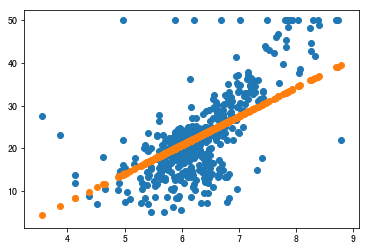

In [59]:
X_rm = X[:,5]
k = 6.731231144958812
b =  -19.576101382681696
price_by_random_k_and_b  = [price(r,k,b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)